In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Lowercase

In [ ]:
df['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## Remove HTML Tags

In [ ]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [ ]:
text = "<html><body><p> Movie 1</p><p> Actor - Aamir Khan</p><p> Click here to <a href='http://google.com'>download</a></p></body></html>"

In [ ]:
remove_html_tags(text)

' Movie 1 Actor - Aamir Khan Click here to download'

In [ ]:
df['review'] = df['review'].apply(remove_html_tags)

In [ ]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

## Remove URLS

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [ ]:
text1 = 'Check out my notebook https://www.kaggle.com/campusx/notebook8223fc1abb'
text2 = 'Check out my notebook http://www.kaggle.com/campusx/notebook8223fc1abb'
text3 = 'Google search here https://www.google.com'
text4 = 'For notebook click https://www.kaggle.com/campusx/notebook8223fc1abb to search check www.google.com'

In [ ]:
remove_url(text1)

'Check out my notebook '

## Remove Punctuation

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation

In [ ]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [ ]:
text = 'string. With. Punctuation?'

In [ ]:
start = time.time()
print(remove_punc(text))
time1 = time.time() - start
print(time1*50000)

string With Punctuation
13.554096221923828


In [ ]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [ ]:
start = time.time()
remove_punc1(text)
time2 = time.time() - start
print(time2*50000)

6.318092346191406


In [ ]:
time1/time2

2.1452830188679246

In [ ]:
df['review'][5]

'probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times in the last 25 years. paul lukas\' performance brings tears to my eyes, and bette davis, in one of her very few truly sympathetic roles, is a delight. the kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. and the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. if i had a dozen thumbs, they\'d all be "up" for this movie.'

In [ ]:
remove_punc1(df['review'][5])

'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'

## Chat Words Treatment

In [ ]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [ ]:
chat_words_list = []
chat_words_map_dict = {}
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

In [ ]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
chat_words_conversion("imo this is awesome")

'In My Opinion this is awesome'

In [ ]:
chat_words_conversion('IMHO he is the best')

'In My Honest/Humble Opinion he is the best'

In [ ]:
chat_words_conversion('FYI delhi is the capital of india')

'For Your Information delhi is the capital of india'

## Spelling Correction

In [ ]:
from textblob import TextBlob

In [ ]:
incorrect_text = 'ceertain conditionas duriing seveal ggenerations aree moodified in the saame maner.'

textBlb = TextBlob(incorrect_text)

textBlb.correct().string

'certain conditions during several generations are modified in the same manner.'

## Remove Stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
remove_stopwords('probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. it just never gets old, despite my having seen it some 15 or more times')

'probably  all-time favorite movie,  story  selflessness, sacrifice  dedication   noble cause,    preachy  boring.   never gets old, despite   seen   15   times'

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# Handle Emoji
#### Remove Emoji

In [ ]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
remove_emoji("Loved the movie. It was 😘😘")

'Loved the movie. It was '

In [ ]:
remove_emoji("Lmao 😂😂")

'Lmao '

### Replace Emoji

In [ ]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import emoji
print(emoji.demojize('Python is 🔥'))

Python is :fire:


In [ ]:
print(emoji.demojize('Loved the movie. It was 😘'))

Loved the movie. It was :face_blowing_a_kiss:


### Handle Emoticons
#### Remove

In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

remove_emoticons("Hello :-)")

'Hello '

## Replace with words

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

text = "Hello :-) :-)"
convert_emoticons(text)

'Hello Happy_face_smiley Happy_face_smiley'

## Tokenization
### 1. Using the split function

In [ ]:
sent1 = 'I am going to delhi'
sent1.split()

['I', 'am', 'going', 'to', 'delhi']

In [ ]:
sent2 = 'I am going to delhi. I will stay there for 3 days. Let\'s hope the trip to be great'
sent2.split('.')

['I am going to delhi',
 ' I will stay there for 3 days',
 " Let's hope the trip to be great"]

In [ ]:
sent_lst = []
for sent in sent2.split('.'):
    sent_lst.append(sent.split())
sent_lst

[['I', 'am', 'going', 'to', 'delhi'],
 ['I', 'will', 'stay', 'there', 'for', '3', 'days'],
 ["Let's", 'hope', 'the', 'trip', 'to', 'be', 'great']]

In [ ]:
sent3 = 'I am going to delhi!'
sent3.split()

['I', 'am', 'going', 'to', 'delhi!']

In [ ]:
sent4 = 'Where do think I should go? I have 3 day holiday'
sent4.split('.')

['Where do think I should go? I have 3 day holiday']

### 2. Regular Expression

In [ ]:
import re
sent3 = 'I am going to delhi!'
tokens = re.findall("[\w']+", sent3)
tokens

['I', 'am', 'going', 'to', 'delhi']

In [ ]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry? 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""
sentences = re.compile('[.!?] ').split(text)
sentences

['Lorem Ipsum is simply dummy text of the printing and typesetting industry',
 "\nLorem Ipsum has been the industry's standard dummy text ever since the 1500s, \nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

### 3. NLTK

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sent1 = 'I am going to visit delhi!'
word_tokenize(sent1)

['I', 'am', 'going', 'to', 'visit', 'delhi', '!']

In [ ]:
text = """Lorem Ipsum is simply dummy text of the printing and typesetting industry? 
Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, 
when an unknown printer took a galley of type and scrambled it to make a type specimen book."""

sent_tokenize(text)

['Lorem Ipsum is simply dummy text of the printing and typesetting industry?',
 "Lorem Ipsum has been the industry's standard dummy text ever since the 1500s, \nwhen an unknown printer took a galley of type and scrambled it to make a type specimen book."]

In [ ]:
sent5 = 'I have a Ph.D in A.I'
sent6 = "We're here to help! mail us at nks@gmail.com"
sent7 = 'A 5km ride cost $10.50'

word_tokenize(sent5)

['I', 'have', 'a', 'Ph.D', 'in', 'A.I']

In [ ]:
word_tokenize(sent6)

['We',
 "'re",
 'here',
 'to',
 'help',
 '!',
 'mail',
 'us',
 'at',
 'nks',
 '@',
 'gmail.com']

In [ ]:
word_tokenize(sent7)

['A', '5km', 'ride', 'cost', '$', '10.50']

### 4. Spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
doc1 = nlp(sent5)
doc2 = nlp(sent6)
doc3 = nlp(sent7)
doc4 = nlp(sent1)

In [ ]:
for token in doc1:
    print(token)

I
have
a
Ph
.
D
in
A.I


## Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [ ]:
text = 'probably my alltime favorite movie a story of selflessness sacrifice and dedication to a noble cause but its not preachy or boring it just never gets old despite my having seen it some 15 or more times in the last 25 years paul lukas performance brings tears to my eyes and bette davis in one of her very few truly sympathetic roles is a delight the kids are as grandma says more like dressedup midgets than children but that only makes them more fun to watch and the mothers slow awakening to whats happening in the world and under her own roof is believable and startling if i had a dozen thumbs theyd all be up for this movie'
# print(text)
stem_words(text)

'probabl my alltim favorit movi a stori of selfless sacrific and dedic to a nobl caus but it not preachi or bore it just never get old despit my have seen it some 15 or more time in the last 25 year paul luka perform bring tear to my eye and bett davi in one of her veri few truli sympathet role is a delight the kid are as grandma say more like dressedup midget than children but that onli make them more fun to watch and the mother slow awaken to what happen in the world and under her own roof is believ and startl if i had a dozen thumb theyd all be up for thi movi'

## Lemmatizer

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))


Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


## Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["review"]
y = df["sentiment"]

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

# Print train target distribution
print(y_train.value_counts())

positive    20000
negative    20000
Name: sentiment, dtype: int64


## Tokenization

In [ ]:
# Load English language model
nlp = spacy.load("en_core_web_sm")

# Disable named-entity recognition and parsing to save time
unwanted_pipes = ["ner", "parser"]

# Custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.lemma_ for t in nlp(doc) if not t.is_stop and not t.is_space and t.pos_ in ["ADJ","NOUN","VERB"]]

## Vectorization

We have to convert variable length strings of text to fixed length numerical vectors to able to train machine learning models on this data. There are two popular approaches for this.

Bag-of-Words; simply counts how many times each word appears in a document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Bag-of-Words vectorizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

# Fit and transform train data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform test data
X_test_bow = vectorizer.transform(X_test)

# Print vocab size
print("BoW vocabulary size:", X_train_bow.shape[1])

BoW vocabulary size: 89541


TF-IDF; multiples term frequency with inverse document frequency. This puts more weight on words that don't appear in many documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Fit and transform train data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = vectorizer.transform(X_test)

# Print vocab size
print("TF-IDF vocabulary size:", X_train_tfidf.shape[1])

TF-IDF vocabulary size: 89541


## Modelling with Naive Bayes
### Using BoW vectors

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:

# Parameters to tune
grid = {"alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

# Define model
clf = MultinomialNB()

# Define grid search
nb_bow = GridSearchCV(clf, param_grid=grid, scoring="f1_macro", n_jobs=-1, cv=5, verbose=5)

# Train model using grid search
nb_bow.fit(X_train_bow, y_train)

# Print best value of alpha
print("Best parameters:", nb_bow.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'alpha': 0.5}


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Make predictions on test set
nb_bow_preds = nb_bow.predict(X_test_bow)

# Print classification report
print(classification_report(y_test, nb_bow_preds, target_names=["negative","positive"]))


              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      5000
    positive       0.86      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

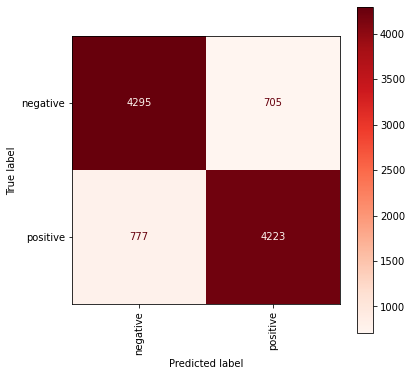

In [ ]:
# Figure size
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)

# Create the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(nb_bow, X_test_bow, y_test, cmap="Reds", display_labels=["negative","positive"], xticks_rotation="vertical", ax=ax)

### Using TF-IDF vectors

Now we'll apply Naive Bayes on the TF-IDF vectorized data. Let's see how it compares to using Bag-of-Words.

In [ ]:
# Parameters to tune
grid = {"alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]}

# Define model
clf = MultinomialNB()

# Define grid search
nb_tfidf = GridSearchCV(clf, param_grid=grid, scoring="f1_macro", n_jobs=-1, cv=5, verbose=5)

# Train model using grid search
nb_tfidf.fit(X_train_tfidf, y_train)

# Print best value of alpha
print("Best parameters:", nb_tfidf.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'alpha': 1.0}


In [ ]:
# Make predictions on test set
nb_tfidf_preds = nb_tfidf.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, nb_tfidf_preds, target_names=["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      5000
    positive       0.86      0.86      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



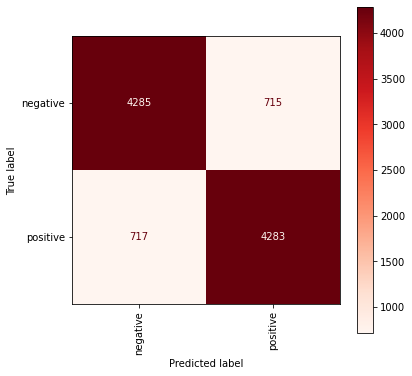

In [ ]:
# Figure size
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)

# Create the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(nb_tfidf, X_test_tfidf, y_test, cmap="Reds", display_labels=["negative","positive"], xticks_rotation="vertical", ax=ax)


## Modelling with Logistic Regression
### Using BoW vectors

Now we'll use a Logistic Regression model on the Bag-of-Words vectorized data to see how it compares to Naive Bayes. We'll also tune the regularization hyperparameters of the model.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Parameters to tune
grid = {"penalty": ["l1","l2"], "solver": ["liblinear"], "C": [0.25, 0.5, 0.75, 1, 1.25, 1.5]}

# Define model
clf = LogisticRegression()

# Define grid search
lr_bow = GridSearchCV(clf, param_grid=grid, scoring="f1_macro", n_jobs=-1, cv=5, verbose=5)

# Train model using grid search
lr_bow.fit(X_train_bow, y_train)

# Print best value of alpha
print("Best parameters:", lr_bow.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 0.25, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Make predictions on test set
lr_bow_preds = lr_bow.predict(X_test_bow)

# Print classification report
print(classification_report(y_test, lr_bow_preds, target_names=["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.88      0.87      0.87      5000
    positive       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



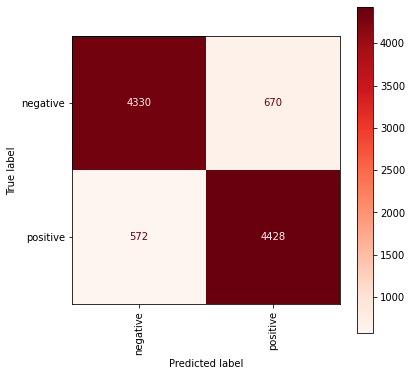

In [ ]:
# Figure size
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)

# Create the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(lr_bow, X_test_bow, y_test, cmap="Reds", display_labels=["negative","positive"], xticks_rotation="vertical", ax=ax)

### Using TF-IDF vectors
Finally, let's use Logistic Regression on the TF-IDF vectorized data.

In [ ]:
# Parameters to tune
grid = {"penalty": ["l1","l2"], "solver": ["liblinear"], "C": [0.25, 0.5, 0.75, 1, 1.25, 1.5]}

# Define model
clf = LogisticRegression()

# Define grid search
lr_tfidf = GridSearchCV(clf, param_grid=grid, scoring="f1_macro", n_jobs=-1, cv=5, verbose=5)

# Train model using grid search
lr_tfidf.fit(X_train_tfidf, y_train)

# Print best value of alpha
print("Best parameters:", lr_tfidf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'C': 1.5, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Make predictions on test set
lr_tfidf_preds = lr_tfidf.predict(X_test_tfidf)

# Print classification report
print(classification_report(y_test, lr_tfidf_preds, target_names=["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      5000
    positive       0.87      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



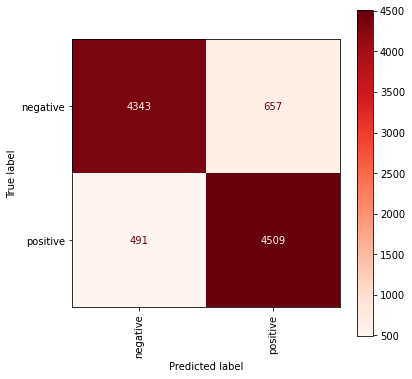

In [ ]:
# Figure size
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)

# Create the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(lr_tfidf, X_test_tfidf, y_test, cmap="Reds", display_labels=["negative","positive"], xticks_rotation="vertical", ax=ax)


## LSTM

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math

In [ ]:
s = 0.0
for i in df['review']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/df.shape[0])
pos = 0
for i in range(df.shape[0]):
    if df.iloc[i]['sentiment'] == 'positive':
        pos = pos + 1
neg = df.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/df.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/df.shape[0]*100)+"%")

Average length of each review :  227.11208
Percentage of reviews with positive sentiment is 50.0%
Percentage of reviews with negative sentiment is 50.0%


### Encoding Labels and Making Train-Test Splits

In [ ]:
reviews = df['review'].values
labels = df['sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [ ]:
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 3
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/3
1055/1055 [==============================] - 351s 327ms/step - loss: 0.4534 - accuracy: 0.7875 - val_loss: 0.3311 - val_accuracy: 0.8568
Epoch 2/3
1055/1055 [==============================] - 338s 320ms/step - loss: 0.3037 - accuracy: 0.8779 - val_loss: 0.2966 - val_accuracy: 0.8795
Epoch 3/3
1055/1055 [==============================] - 348s 330ms/step - loss: 0.2673 - accuracy: 0.8931 - val_loss: 0.3476 - val_accuracy: 0.8451


In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

391/391 [==============================] - 37s 92ms/step
Accuracy of prediction on test set :  0.8488


In [ ]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming", 
            "I have never seen a terrible movie like this", 
            "the movie plot is terrible but it had good acting"]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

1/1 [==============================] - 0s 49ms/step
The movie was very touching and heart whelming
Predicted sentiment :  Positive
I have never seen a terrible movie like this
Predicted sentiment :  Negative
the movie plot is terrible but it had good acting
Predicted sentiment :  Negative
